The logistic recursive sequence is defined as

![alt text](exercise1.1.png)

Exercise
Do this in your own coding environment. Generate and plot the first 50 elements of this sequence when the following values are used:

![alt text](exercise1.2.png)

In [155]:
import numpy as np
import sys
def generator(seed,weight,number_of_element,):
    seq = []
    seq.append(seed)
    
    n=2
    def recursive(number_of_element,weight,n):
        previos_s = seq[-1]
        tmp = (weight*previos_s) - (weight* np.square(previos_s))
        seq.append(tmp)
        sys.stdout.write("\r\rhas been called with n = %i \t%s is added" % (n,str(tmp)))
        sys.stdout.flush()
        
        if n == 50:
            return
        else:
            recursive(number_of_element,weight,n+1)
    
    recursive(number_of_element,weight,n)
    return seq

import matplotlib.pyplot as plt
def plot_list(list_):
    plt.plot(list_,'r')
    plt.plot(list_, 'ob', markersize=3)
#     plt.scatter(list_,[0]*len(list_),s=10)
    plt.ylabel('Value')
    plt.xlabel('Step')
    plt.show()

has been called with n = 50 	0.0182609239318 is added

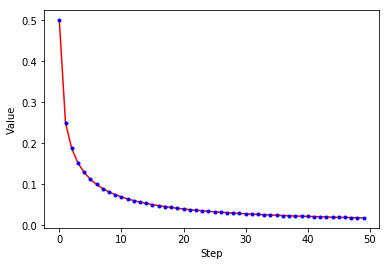

has been called with n = 50 	0.696428734471 is added

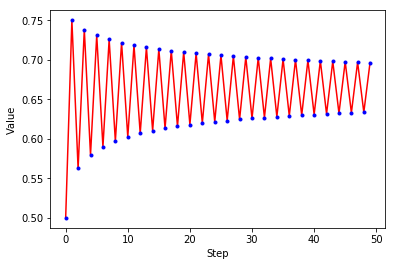

has been called with n = 50 	0.640179068106 is addeddd

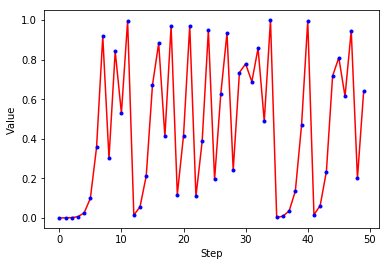

In [156]:
example1 = generator(0.5,1,50)
plot_list(example1)
example2 = generator(0.5,3,50)
plot_list(example2)
example3 = generator(0.0001,4,50)
plot_list(example3)

In [280]:
import copy

def create_dataset(data, ratio = 0.8, look_back=1):
    train_size = int(len(data) * ratio * ratio)
    valid_size = int(train_size * ratio * (1-ratio))
    test_size = len(data) - valid_size- train_size-1
    print('Total size of data %d' %len(data))
    print('length of training set',train_size,'length of valid set',valid_size, 'length of testing set',test_size)
    
    X = copy.copy(data[:-look_back])
    Y = copy.copy(data[look_back:])
        
    trainX, trainY = X[:train_size], Y[:train_size]
    validX, validY = X[train_size:(train_size+valid_size)],  Y[train_size:(train_size+valid_size)]
    testX, testY =  X[train_size+valid_size:], Y[train_size+valid_size:]

    return np.array(trainX), np.array(trainY), np.array(validX), np.array(validY), np.array(testX), np.array(testY)

In [281]:
trainX, trainY, validX, validY, testX, testY = create_dataset(example1,0.8)

Total size of data 50
length of training set 32 length of valid set 5 length of testing set 12


In [298]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
layer = Dense(1,input_dim=1,activation='linear')
model.add(layer)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________


In [324]:
from keras.callbacks import ModelCheckpoint  

epochs = 3000

checkpointer = ModelCheckpoint(filepath='timeseries.hdf5', verbose=1, save_best_only=True)

model.fit(trainX, trainY, 
          validation_data=(validX, validY),
          epochs=epochs, batch_size=3, callbacks=[checkpointer], verbose=0)

Epoch 00000: val_loss improved from inf to 0.00075, saving model to timeseries.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017: val_loss did not improve
Epoch 00018: val_loss did not improve
Epoch 00019: val_loss did not improve
Epoch 00020: val_loss did not improve
Epoch 00021: val_loss did not improve
Epoch 00022: val_loss did not improve
Epoch 00023: val_loss did not improve
Epoch 00024: val_loss did not improve
Epoc

Epoch 00218: val_loss improved from 0.00043 to 0.00043, saving model to timeseries.hdf5
Epoch 00219: val_loss improved from 0.00043 to 0.00040, saving model to timeseries.hdf5
Epoch 00220: val_loss improved from 0.00040 to 0.00040, saving model to timeseries.hdf5
Epoch 00221: val_loss did not improve
Epoch 00222: val_loss did not improve
Epoch 00223: val_loss did not improve
Epoch 00224: val_loss did not improve
Epoch 00225: val_loss did not improve
Epoch 00226: val_loss did not improve
Epoch 00227: val_loss improved from 0.00040 to 0.00039, saving model to timeseries.hdf5
Epoch 00228: val_loss improved from 0.00039 to 0.00037, saving model to timeseries.hdf5
Epoch 00229: val_loss improved from 0.00037 to 0.00037, saving model to timeseries.hdf5
Epoch 00230: val_loss did not improve
Epoch 00231: val_loss did not improve
Epoch 00232: val_loss did not improve
Epoch 00233: val_loss did not improve
Epoch 00234: val_loss improved from 0.00037 to 0.00036, saving model to timeseries.hdf5
Epoc

Epoch 00390: val_loss did not improve
Epoch 00391: val_loss did not improve
Epoch 00392: val_loss did not improve
Epoch 00393: val_loss did not improve
Epoch 00394: val_loss did not improve
Epoch 00395: val_loss did not improve
Epoch 00396: val_loss did not improve
Epoch 00397: val_loss did not improve
Epoch 00398: val_loss did not improve
Epoch 00399: val_loss did not improve
Epoch 00400: val_loss did not improve
Epoch 00401: val_loss did not improve
Epoch 00402: val_loss did not improve
Epoch 00403: val_loss did not improve
Epoch 00404: val_loss did not improve
Epoch 00405: val_loss did not improve
Epoch 00406: val_loss did not improve
Epoch 00407: val_loss did not improve
Epoch 00408: val_loss did not improve
Epoch 00409: val_loss did not improve
Epoch 00410: val_loss did not improve
Epoch 00411: val_loss did not improve
Epoch 00412: val_loss did not improve
Epoch 00413: val_loss did not improve
Epoch 00414: val_loss did not improve
Epoch 00415: val_loss did not improve
Epoch 00416:

Epoch 00621: val_loss did not improve
Epoch 00622: val_loss improved from 0.00011 to 0.00010, saving model to timeseries.hdf5
Epoch 00623: val_loss did not improve
Epoch 00624: val_loss did not improve
Epoch 00625: val_loss did not improve
Epoch 00626: val_loss did not improve
Epoch 00627: val_loss did not improve
Epoch 00628: val_loss did not improve
Epoch 00629: val_loss did not improve
Epoch 00630: val_loss did not improve
Epoch 00631: val_loss did not improve
Epoch 00632: val_loss did not improve
Epoch 00633: val_loss did not improve
Epoch 00634: val_loss did not improve
Epoch 00635: val_loss did not improve
Epoch 00636: val_loss did not improve
Epoch 00637: val_loss did not improve
Epoch 00638: val_loss did not improve
Epoch 00639: val_loss did not improve
Epoch 00640: val_loss did not improve
Epoch 00641: val_loss did not improve
Epoch 00642: val_loss did not improve
Epoch 00643: val_loss did not improve
Epoch 00644: val_loss did not improve
Epoch 00645: val_loss did not improve


Epoch 00853: val_loss did not improve
Epoch 00854: val_loss did not improve
Epoch 00855: val_loss did not improve
Epoch 00856: val_loss did not improve
Epoch 00857: val_loss did not improve
Epoch 00858: val_loss did not improve
Epoch 00859: val_loss did not improve
Epoch 00860: val_loss did not improve
Epoch 00861: val_loss did not improve
Epoch 00862: val_loss did not improve
Epoch 00863: val_loss did not improve
Epoch 00864: val_loss did not improve
Epoch 00865: val_loss did not improve
Epoch 00866: val_loss improved from 0.00010 to 0.00010, saving model to timeseries.hdf5
Epoch 00867: val_loss did not improve
Epoch 00868: val_loss did not improve
Epoch 00869: val_loss did not improve
Epoch 00870: val_loss did not improve
Epoch 00871: val_loss did not improve
Epoch 00872: val_loss did not improve
Epoch 00873: val_loss did not improve
Epoch 00874: val_loss did not improve
Epoch 00875: val_loss did not improve
Epoch 00876: val_loss did not improve
Epoch 00877: val_loss did not improve


Epoch 01069: val_loss did not improve
Epoch 01070: val_loss did not improve
Epoch 01071: val_loss did not improve
Epoch 01072: val_loss did not improve
Epoch 01073: val_loss did not improve
Epoch 01074: val_loss did not improve
Epoch 01075: val_loss did not improve
Epoch 01076: val_loss did not improve
Epoch 01077: val_loss did not improve
Epoch 01078: val_loss did not improve
Epoch 01079: val_loss did not improve
Epoch 01080: val_loss did not improve
Epoch 01081: val_loss did not improve
Epoch 01082: val_loss did not improve
Epoch 01083: val_loss did not improve
Epoch 01084: val_loss did not improve
Epoch 01085: val_loss did not improve
Epoch 01086: val_loss did not improve
Epoch 01087: val_loss did not improve
Epoch 01088: val_loss did not improve
Epoch 01089: val_loss did not improve
Epoch 01090: val_loss did not improve
Epoch 01091: val_loss did not improve
Epoch 01092: val_loss did not improve
Epoch 01093: val_loss did not improve
Epoch 01094: val_loss did not improve
Epoch 01095:

Epoch 01301: val_loss did not improve
Epoch 01302: val_loss did not improve
Epoch 01303: val_loss did not improve
Epoch 01304: val_loss did not improve
Epoch 01305: val_loss did not improve
Epoch 01306: val_loss did not improve
Epoch 01307: val_loss did not improve
Epoch 01308: val_loss did not improve
Epoch 01309: val_loss did not improve
Epoch 01310: val_loss did not improve
Epoch 01311: val_loss did not improve
Epoch 01312: val_loss did not improve
Epoch 01313: val_loss did not improve
Epoch 01314: val_loss did not improve
Epoch 01315: val_loss did not improve
Epoch 01316: val_loss did not improve
Epoch 01317: val_loss did not improve
Epoch 01318: val_loss did not improve
Epoch 01319: val_loss did not improve
Epoch 01320: val_loss did not improve
Epoch 01321: val_loss did not improve
Epoch 01322: val_loss did not improve
Epoch 01323: val_loss did not improve
Epoch 01324: val_loss did not improve
Epoch 01325: val_loss did not improve
Epoch 01326: val_loss did not improve
Epoch 01327:

Epoch 01529: val_loss did not improve
Epoch 01530: val_loss did not improve
Epoch 01531: val_loss did not improve
Epoch 01532: val_loss did not improve
Epoch 01533: val_loss did not improve
Epoch 01534: val_loss did not improve
Epoch 01535: val_loss did not improve
Epoch 01536: val_loss did not improve
Epoch 01537: val_loss did not improve
Epoch 01538: val_loss did not improve
Epoch 01539: val_loss did not improve
Epoch 01540: val_loss did not improve
Epoch 01541: val_loss did not improve
Epoch 01542: val_loss did not improve
Epoch 01543: val_loss did not improve
Epoch 01544: val_loss did not improve
Epoch 01545: val_loss did not improve
Epoch 01546: val_loss did not improve
Epoch 01547: val_loss did not improve
Epoch 01548: val_loss did not improve
Epoch 01549: val_loss did not improve
Epoch 01550: val_loss did not improve
Epoch 01551: val_loss did not improve
Epoch 01552: val_loss did not improve
Epoch 01553: val_loss did not improve
Epoch 01554: val_loss did not improve
Epoch 01555:

Epoch 01760: val_loss did not improve
Epoch 01761: val_loss did not improve
Epoch 01762: val_loss did not improve
Epoch 01763: val_loss did not improve
Epoch 01764: val_loss did not improve
Epoch 01765: val_loss did not improve
Epoch 01766: val_loss did not improve
Epoch 01767: val_loss did not improve
Epoch 01768: val_loss did not improve
Epoch 01769: val_loss did not improve
Epoch 01770: val_loss did not improve
Epoch 01771: val_loss did not improve
Epoch 01772: val_loss did not improve
Epoch 01773: val_loss did not improve
Epoch 01774: val_loss did not improve
Epoch 01775: val_loss did not improve
Epoch 01776: val_loss did not improve
Epoch 01777: val_loss did not improve
Epoch 01778: val_loss did not improve
Epoch 01779: val_loss did not improve
Epoch 01780: val_loss did not improve
Epoch 01781: val_loss did not improve
Epoch 01782: val_loss did not improve
Epoch 01783: val_loss did not improve
Epoch 01784: val_loss did not improve
Epoch 01785: val_loss did not improve
Epoch 01786:

Epoch 01993: val_loss did not improve
Epoch 01994: val_loss did not improve
Epoch 01995: val_loss did not improve
Epoch 01996: val_loss did not improve
Epoch 01997: val_loss did not improve
Epoch 01998: val_loss did not improve
Epoch 01999: val_loss did not improve
Epoch 02000: val_loss did not improve
Epoch 02001: val_loss did not improve
Epoch 02002: val_loss did not improve
Epoch 02003: val_loss did not improve
Epoch 02004: val_loss did not improve
Epoch 02005: val_loss did not improve
Epoch 02006: val_loss did not improve
Epoch 02007: val_loss did not improve
Epoch 02008: val_loss did not improve
Epoch 02009: val_loss did not improve
Epoch 02010: val_loss did not improve
Epoch 02011: val_loss did not improve
Epoch 02012: val_loss did not improve
Epoch 02013: val_loss did not improve
Epoch 02014: val_loss did not improve
Epoch 02015: val_loss did not improve
Epoch 02016: val_loss did not improve
Epoch 02017: val_loss did not improve
Epoch 02018: val_loss did not improve
Epoch 02019:

Epoch 02227: val_loss did not improve
Epoch 02228: val_loss did not improve
Epoch 02229: val_loss did not improve
Epoch 02230: val_loss did not improve
Epoch 02231: val_loss did not improve
Epoch 02232: val_loss did not improve
Epoch 02233: val_loss did not improve
Epoch 02234: val_loss did not improve
Epoch 02235: val_loss did not improve
Epoch 02236: val_loss did not improve
Epoch 02237: val_loss did not improve
Epoch 02238: val_loss did not improve
Epoch 02239: val_loss did not improve
Epoch 02240: val_loss did not improve
Epoch 02241: val_loss did not improve
Epoch 02242: val_loss did not improve
Epoch 02243: val_loss did not improve
Epoch 02244: val_loss did not improve
Epoch 02245: val_loss did not improve
Epoch 02246: val_loss did not improve
Epoch 02247: val_loss did not improve
Epoch 02248: val_loss did not improve
Epoch 02249: val_loss did not improve
Epoch 02250: val_loss did not improve
Epoch 02251: val_loss did not improve
Epoch 02252: val_loss did not improve
Epoch 02253:

Epoch 02459: val_loss did not improve
Epoch 02460: val_loss did not improve
Epoch 02461: val_loss did not improve
Epoch 02462: val_loss did not improve
Epoch 02463: val_loss did not improve
Epoch 02464: val_loss did not improve
Epoch 02465: val_loss did not improve
Epoch 02466: val_loss did not improve
Epoch 02467: val_loss did not improve
Epoch 02468: val_loss did not improve
Epoch 02469: val_loss did not improve
Epoch 02470: val_loss did not improve
Epoch 02471: val_loss did not improve
Epoch 02472: val_loss did not improve
Epoch 02473: val_loss did not improve
Epoch 02474: val_loss did not improve
Epoch 02475: val_loss did not improve
Epoch 02476: val_loss did not improve
Epoch 02477: val_loss did not improve
Epoch 02478: val_loss did not improve
Epoch 02479: val_loss did not improve
Epoch 02480: val_loss did not improve
Epoch 02481: val_loss did not improve
Epoch 02482: val_loss did not improve
Epoch 02483: val_loss did not improve
Epoch 02484: val_loss did not improve
Epoch 02485:

Epoch 02693: val_loss did not improve
Epoch 02694: val_loss did not improve
Epoch 02695: val_loss did not improve
Epoch 02696: val_loss did not improve
Epoch 02697: val_loss did not improve
Epoch 02698: val_loss did not improve
Epoch 02699: val_loss did not improve
Epoch 02700: val_loss did not improve
Epoch 02701: val_loss did not improve
Epoch 02702: val_loss did not improve
Epoch 02703: val_loss did not improve
Epoch 02704: val_loss did not improve
Epoch 02705: val_loss did not improve
Epoch 02706: val_loss did not improve
Epoch 02707: val_loss did not improve
Epoch 02708: val_loss did not improve
Epoch 02709: val_loss did not improve
Epoch 02710: val_loss did not improve
Epoch 02711: val_loss did not improve
Epoch 02712: val_loss did not improve
Epoch 02713: val_loss did not improve
Epoch 02714: val_loss did not improve
Epoch 02715: val_loss did not improve
Epoch 02716: val_loss did not improve
Epoch 02717: val_loss did not improve
Epoch 02718: val_loss did not improve
Epoch 02719:

Epoch 02928: val_loss did not improve
Epoch 02929: val_loss did not improve
Epoch 02930: val_loss did not improve
Epoch 02931: val_loss did not improve
Epoch 02932: val_loss did not improve
Epoch 02933: val_loss did not improve
Epoch 02934: val_loss did not improve
Epoch 02935: val_loss did not improve
Epoch 02936: val_loss did not improve
Epoch 02937: val_loss did not improve
Epoch 02938: val_loss did not improve
Epoch 02939: val_loss did not improve
Epoch 02940: val_loss did not improve
Epoch 02941: val_loss did not improve
Epoch 02942: val_loss did not improve
Epoch 02943: val_loss did not improve
Epoch 02944: val_loss did not improve
Epoch 02945: val_loss did not improve
Epoch 02946: val_loss did not improve
Epoch 02947: val_loss did not improve
Epoch 02948: val_loss did not improve
Epoch 02949: val_loss did not improve
Epoch 02950: val_loss did not improve
Epoch 02951: val_loss did not improve
Epoch 02952: val_loss did not improve
Epoch 02953: val_loss did not improve
Epoch 02954:

In [331]:
model.load_weights('timeseries.hdf5')
model.evaluate(trainX, trainY, verbose=0)
model.get_weights()

[array([[ 0.53327054]], dtype=float32), array([ 0.02070346], dtype=float32)]

In [336]:
def compare_graph(true,predict):
    plt.plot(true,'b')
    plt.plot(true, 'ob', markersize=3, label='true')
    
    plt.plot(predict,'r')
    plt.plot(predict, 'or', markersize=3, label='predict')
    
    legend = plt.legend(loc='upper right', shadow=True)
    plt.ylabel('Value')
    plt.xlabel('Step')
    plt.show()

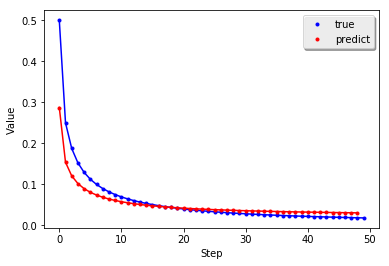

In [346]:
trainPredict = model.predict(trainX)
validPredict = model.predict(validX)
testPredict = model.predict(testX)
Prediction = np.concatenate((trainPredict,validPredict,testPredict),axis=0)
compare_graph(example1,Prediction)

In [354]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint 

def run_prediction(example):
    trainX, trainY, validX, validY, testX, testY = create_dataset(example,0.8)
    
    model = Sequential()
    layer = Dense(1,input_dim=1,activation='linear')
    model.add(layer)
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.summary()
    
    epochs = 3000
    checkpointer = ModelCheckpoint(filepath='timeseries.hdf5', verbose=0, save_best_only=True)
    model.fit(trainX, trainY, 
              validation_data=(validX, validY),
              epochs=epochs, batch_size=3, callbacks=[checkpointer], verbose=0)
    model.load_weights('timeseries.hdf5')
    print ('model evaluate:', model.evaluate(trainX, trainY, verbose=0))
    print ('model weight:', model.get_weights())
    
    trainPredict = model.predict(trainX)
    validPredict = model.predict(validX)
    testPredict = model.predict(testX)
    Prediction = np.concatenate((trainPredict,validPredict,testPredict),axis=0)
    compare_graph(example,Prediction)

Total size of data 50
length of training set 32 length of valid set 5 length of testing set 12
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________
model evaluate: 0.000530345074367
model weight: [array([[ 0.74063027]], dtype=float32), array([ 0.00595834], dtype=float32)]


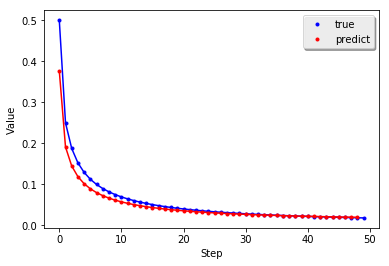

In [355]:
run_prediction(example1)

Total size of data 50
length of training set 32 length of valid set 5 length of testing set 12
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________
model evaluate: 0.000155710920808
model weight: [array([[-0.85770237]], dtype=float32), array([ 1.23097253], dtype=float32)]


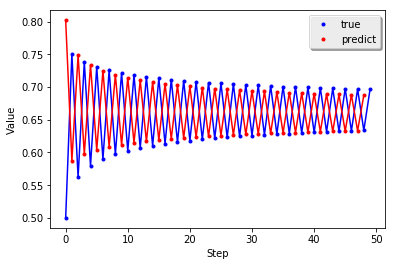

In [ ]:
run_prediction(example2)

In [ ]:
run_prediction(example3)

Total size of data 50
length of training set 32 length of valid set 5 length of testing set 12
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________
